# Deep Learning

# Assignment 2 -CNN

### Submitted by:
#### Name      : Muhammad Amin Ghias
#### ERP ID    : 25366

Date : 26th November 2022

# Dataset -6 cars_wagonr_swift Dataset

In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8167128384657568980
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1358095566
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3455710557596060616
physical_device_desc: "device: 0, name: NVIDIA GeForce MX330, pci bus id: 0000:01:00.0, compute capability: 6.1"
xla_global_id: 416903419
]


In [2]:
# tf.config.experimental.get_memory_usage("/device:GPU:0"
    
# )

In [3]:
# tf.config.experimental.get_memory_info("/device:GPU:0")['current']

In [4]:
import tensorflow as tf
print(tf.test.is_built_with_cuda())

True


In [5]:
import tensorflow as tf 

if tf.test.gpu_device_name(): 

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

   print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [6]:
# ! pip install --upgrade pip
# ! pip install scikit-image
# ! pip install pandas
# ! pip install seaborn
# ! pip install -U scikit-learn
# ! pip install seaborn
# ! pip install opencv-python

# Importing Libraries

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sklearn
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, GlobalAveragePooling2D, UpSampling2D, Input, LeakyReLU
from keras.layers import Conv2DTranspose
from tensorflow.keras.layers import MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import Sequence
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.inception_v3 import InceptionV3
from sklearn.neural_network import MLPClassifier
from keras.utils.vis_utils import plot_model
from keras.layers.core import Dense, Activation, Dropout
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix
import keras
from keras import layers
import random as rnd
import cv2
import matplotlib.image as mpimg
from PIL import Image
%matplotlib inline

In [8]:
import cv2
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import normalize
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, GlobalAveragePooling2D, UpSampling2D, Input, LeakyReLU
from keras.layers import Conv2DTranspose
from tensorflow.keras.layers import MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import Sequence
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.inception_v3 import InceptionV3
from sklearn.neural_network import MLPClassifier
from keras.utils.vis_utils import plot_model
from keras.layers.core import Dense, Activation, Dropout
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix
import keras
from keras import layers
import random as rnd
import cv2
import matplotlib.image as mpimg
from PIL import Image
from keras.utils import np_utils
import tensorflow
from tensorflow.keras import optimizers

import datetime
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.callbacks import EarlyStopping

from keras.layers import AveragePooling2D
from keras.layers import MaxPooling2D

from keras.callbacks import ModelCheckpoint

from keras.callbacks import ReduceLROnPlateau

from keras.models import Sequential, load_model

from keras.layers import LeakyReLU

from datetime import datetime



# Initial Data preprocessing

### Data will be put through following data processing:

##### 1) Making intial dataset with image paths, directories and names

##### 2) Reading images 

##### 3) Converting images to array

##### 4) Reszizing image 

##### 5) Forming final dataset with image array, image path, image name, image class etc

##### 6) Making train test datsest

##### 7) Normalizing the train , test data

## 1) Making Dataset

In [10]:
data = pd.DataFrame()
main_path = 'train/'
name=[]


pa = 'train'

entry = []
for filename in os.listdir(pa):
    entry.append(filename)
print(entry)
l=[]
for i in entry:
    name.append(os.listdir('train/'+i))
    l.append(i)

len(name)

pn=[]
paths = []
classes = []
lab=[]
for i in range(len(name)):
    for j in name[i]:
        pn.append(j)
        paths.append(main_path+entry[i]+'/'+j)
        classes.append(entry[i])
        lab.append(i)

print(l)

print(len(name))
      
print(len(pn))

print(len(paths))

# pn

data['images_name']= pn
# classes = []
# paths = []
# for image in data['images_name']:
# #     class_ = image.split('_')[0]
    
# #     if class_ == 'Ala':
# #         class_='Ala_Idris'
        
# #     classes.append(int(class_))
#     paths.append(main_path+str(int(class_))+'/'+image)

data['classes'] = classes
data['path'] = paths
print(len(data))
data.head()

['swift', 'wagonr']
['swift', 'wagonr']
2
2400
2400
2400


,images_name,classes,path
0,00duslv28ydk2-IN.jpg,swift,train/swift/00duslv28ydk2-IN.jpg
1,00xwm26884k-IN.jpg,swift,train/swift/00xwm26884k-IN.jpg
2,034zbve1rf6x1-IN.jpg,swift,train/swift/034zbve1rf6x1-IN.jpg
3,03m2c8qw9ys73-IN.jpg,swift,train/swift/03m2c8qw9ys73-IN.jpg
4,050zxklfw5br1-IN.jpg,swift,train/swift/050zxklfw5br1-IN.jpg


In [11]:
li = data.classes.unique()

li=list(li)


In [12]:
li

['swift', 'wagonr']

## 2) Reading images  3) Converting images to array  4) Reszizing image 

In [13]:
df = data.copy()
im = []
pic = []
label = []
INPUT_SIZE=128



for i in range(len(df)):
    
    p = df.loc[i,'path']
    c = df.loc[i,'classes']

    

    image=cv2.imread(p)

    image=Image.fromarray(image,'RGB')

    image=image.resize((INPUT_SIZE,INPUT_SIZE))
    #append image arry in dataset list and its label in label list
    im.append(np.array(image))
    

    pic.append(image)
#     label.append(cl)



## 5) Forming final dataset with image array, image path, image name, image class etc

In [14]:
dataset = im

print(type(im))
# print(type(label))

dataset=np.array(dataset)
# label=np.array(label)

print(type(dataset))
# print(type(label))

<class 'list'>
<class 'numpy.ndarray'>


<ipython-input-15-ad9a3bf570cb>:3: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  pi = np.array(pic)
<ipython-input-15-ad9a3bf570cb>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  pi = np.array(pic)


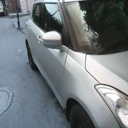

In [15]:
df['im_array']= im
# df['label']=label
pi = np.array(pic)
df['pic']=pi
df.loc[1,'pic']

In [16]:
df.shape

(2400, 5)

In [17]:
df['label']=lab
# label=df.classes
type(label)

list

In [18]:
label=df['label']

In [19]:
len(li)

2

In [21]:
df.label.value_counts()

0    1200
1    1200
Name: label, dtype: int64

In [22]:
df.head()

,images_name,classes,path,im_array,pic,label
0,00duslv28ydk2-IN.jpg,swift,train/swift/00duslv28ydk2-IN.jpg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",<PIL.Image.Image image mode=RGB size=128x128 a...,0
1,00xwm26884k-IN.jpg,swift,train/swift/00xwm26884k-IN.jpg,"[[[70, 72, 80], [36, 42, 50], [47, 58, 66], [4...",<PIL.Image.Image image mode=RGB size=128x128 a...,0
2,034zbve1rf6x1-IN.jpg,swift,train/swift/034zbve1rf6x1-IN.jpg,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",<PIL.Image.Image image mode=RGB size=128x128 a...,0
3,03m2c8qw9ys73-IN.jpg,swift,train/swift/03m2c8qw9ys73-IN.jpg,"[[[217, 243, 250], [216, 243, 253], [208, 236,...",<PIL.Image.Image image mode=RGB size=128x128 a...,0
4,050zxklfw5br1-IN.jpg,swift,train/swift/050zxklfw5br1-IN.jpg,"[[[206, 211, 214], [206, 211, 214], [205, 210,...",<PIL.Image.Image image mode=RGB size=128x128 a...,0


## 6) Making train test datsest  7) Normalizing the train , test data

## Splitting data into train test 

In [23]:
x_train, x_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.2, random_state = 42)
              
print(x_train.shape) 
print(y_train.shape) 

x_train = normalize( x_train, axis =1)
x_test = normalize( x_test, axis =1)

num_classes = len(li)

y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)


(1920, 128, 128, 3)
(1920,)


In [24]:
num_classes

2

## Making a image preprocessing augmentation for CNN input

### Data will be put through following image processing before being given to CNN:

##### 1) flips (horizaontal_vertical)

##### 2) Zooming

##### 3) Shifting (height and width)

##### 4) Rotation 

In [26]:

datagen_preprocessing =ImageDataGenerator(                                          
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     zoom_range=0.1,
                                     horizontal_flip=True,
                                     vertical_flip=True,
                                     fill_mode='nearest')

# Building Model

#### Making a dataset to store results in

In [27]:
df_r=pd.DataFrame(columns=['activation_function','number_filters','pooling','epochs','test_accuracy'])

df_r

,activation_function,number_filters,pooling,epochs,test_accuracy


### Making a function model for our use

### Note:

For this model we have used Adam optimizer (which was found performing better than RMSprop) as Adam mostly gives bteer results

The Learning rate of Adam is 0.001

We have used following callbacks in fitting:

    1) Early Stopping:
    
        i) patience = 25 (that is if the best results dont improve after 15 epochs the model will stop early)
        
        ii) baseline = 0.2 (if models val-accuracy doesnt imporve than 0.2 in the patinece interval of 25 epochs model will stop early)
        
        iii) monitroing val-accuracy (test set accuracy)
        
    2)  ModelCheckpoint -(Which will save the results of epoch which gives maximum accuracy)

In [28]:
def CNN_model(filt,activation_function,pool,epoch):

    model = Sequential()
    model.add(Conv2D(filters=filt, kernel_size=(3,3), input_shape=(x_train.shape[1:]), activation=activation_function))
    if pool== 'max':
        model.add(MaxPooling2D((2,2)))
    elif pool == 'average':
        model.add(AveragePooling2D((2,2)))
    
    model.add(BatchNormalization())
    model.add(Conv2D(filters=filt, kernel_size=(3,3), activation=activation_function))
    if pool== 'max':
        model.add(MaxPooling2D((2,2)))
    elif pool == 'average':
        model.add(AveragePooling2D((2,2)))
#     model.add(MaxPooling2D((2,2)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=filt, kernel_size=(3,3), activation=activation_function))
    if pool== 'max':
        model.add(MaxPooling2D((2,2)))
    elif pool == 'average':
        model.add(AveragePooling2D((2,2)))
#     model.add(MaxPooling2D((2,2)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=filt, kernel_size=(3,3), activation=activation_function))
    if pool== 'max':
        model.add(MaxPooling2D((2,2)))
    elif pool == 'average':
        model.add(AveragePooling2D((2,2)))
#     model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.25))
    model.add(BatchNormalization())
    model.add(Flatten())
    # model.add(Dense(units=512, activation="relu"))
    # model.add(BatchNormalization())
    model.add(Dense(units=512, activation=activation_function))
    model.add(BatchNormalization())
    # model.add(Dropout(0.5))
    model.add(Dense(units=256, activation=activation_function))
    model.add(BatchNormalization())
    # model.add(Dropout(0.5))
    model.add(Dense(units=64, activation=activation_function))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(units=num_classes,  activation="softmax"))

    model.summary()


    batch_size = 32

    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    
#     opt = tf.keras.optimizers.Adam(learning_rate=0.1)


    # Let's train the model_1 using RMSprop
    model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])

    
    
    es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=15, baseline=0.2, restore_best_weights=True)

    
#     reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
#                               patience=4, min_lr=0.0005)

    filepath = 'model_'+str(filt)+'_'+str(activation_function)+'_'+str(pool)+'.hdf5'
#     filepath = 'my_best_model.hdf5'
    checkpoint = ModelCheckpoint( 
                                filepath=filepath,
                                 monitor='val_accuracy',
                                 verbose=1, 
                                 save_best_only=True,
                                 mode='max')
    
    now = datetime.now
    t= now()


    history = model.fit(datagen_preprocessing.flow(x_train,y_train,
                                        batch_size=batch_size, 
                                        seed=27,
                                        shuffle=False),
                                batch_size=batch_size,
                                epochs=epoch,
                                validation_data=(x_test, y_test),
                                callbacks=[checkpoint,es],
                                shuffle=True)



    print('Training time: %s' % (now() - t))
    
    
    model_l2 = load_model(filepath)

    score = model_l2.evaluate(x_test, y_test, verbose=0)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])

    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    global df_r
    
    df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,
                        'epochs':epoch,'test_accuracy':score[1]},ignore_index=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 62)      1736      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 62)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 63, 63, 62)       248       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 62)        34658     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 62)       0         
 2D)                                                             
                                                        

60/60 [==============================] - 16s 264ms/step - loss: 0.5671 - accuracy: 0.7063 - val_loss: 0.5161 - val_accuracy: 0.7188
Epoch 16/30
60/60 [==============================] - ETA: 0s - loss: 0.5367 - accuracy: 0.7203
Epoch 16: val_accuracy improved from 0.71875 to 0.76458, saving model to model_62_relu_max.hdf5
60/60 [==============================] - 15s 253ms/step - loss: 0.5367 - accuracy: 0.7203 - val_loss: 0.4860 - val_accuracy: 0.7646
Epoch 17/30
60/60 [==============================] - ETA: 0s - loss: 0.5227 - accuracy: 0.7318
Epoch 17: val_accuracy did not improve from 0.76458
60/60 [==============================] - 16s 259ms/step - loss: 0.5227 - accuracy: 0.7318 - val_loss: 0.6252 - val_accuracy: 0.7146
Epoch 18/30
60/60 [==============================] - ETA: 0s - loss: 0.5216 - accuracy: 0.7365
Epoch 18: val_accuracy did not improve from 0.76458
60/60 [==============================] - 16s 263ms/step - loss: 0.5216 - accuracy: 0.7365 - val_loss: 0.4976 - val_accu

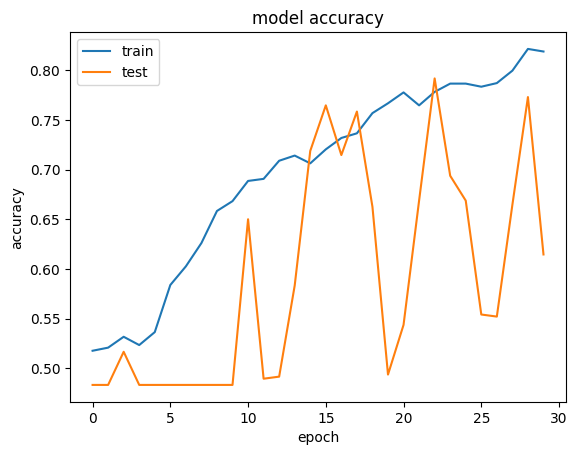

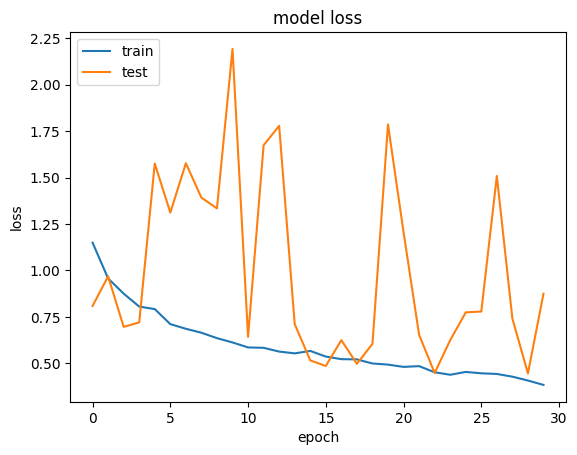

<ipython-input-28-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


In [29]:
CNN_model(62,'relu','max',30)

In [30]:
df_r

,activation_function,number_filters,pooling,epochs,test_accuracy
0,relu,62,max,30,0.791667


# Find the best Relu Variants

In [31]:
act=['relu','elu','gelu','selu','LeakyReLU']

# act2=['selu','LeakyReLU']

#### Best activation with max pooling

relu
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_7 (Batc  (None, 63, 63, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                 

60/60 [==============================] - 17s 277ms/step - loss: 0.5718 - accuracy: 0.7036 - val_loss: 1.0069 - val_accuracy: 0.5437
Epoch 16/25
60/60 [==============================] - ETA: 0s - loss: 0.5726 - accuracy: 0.7000
Epoch 16: val_accuracy did not improve from 0.58542
60/60 [==============================] - 17s 276ms/step - loss: 0.5726 - accuracy: 0.7000 - val_loss: 1.5547 - val_accuracy: 0.4875
Epoch 17/25
60/60 [==============================] - ETA: 0s - loss: 0.5785 - accuracy: 0.7083
Epoch 17: val_accuracy improved from 0.58542 to 0.68958, saving model to model_64_relu_max.hdf5
60/60 [==============================] - 18s 304ms/step - loss: 0.5785 - accuracy: 0.7083 - val_loss: 0.5837 - val_accuracy: 0.6896
Epoch 18/25
60/60 [==============================] - ETA: 0s - loss: 0.5695 - accuracy: 0.6953
Epoch 18: val_accuracy did not improve from 0.68958
60/60 [==============================] - 16s 255ms/step - loss: 0.5695 - accuracy: 0.6953 - val_loss: 1.9757 - val_accu

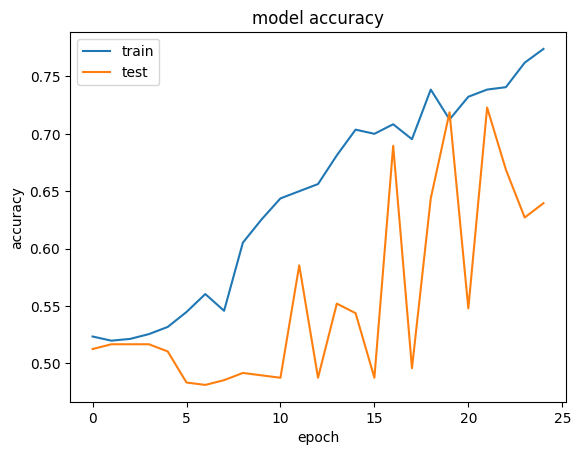

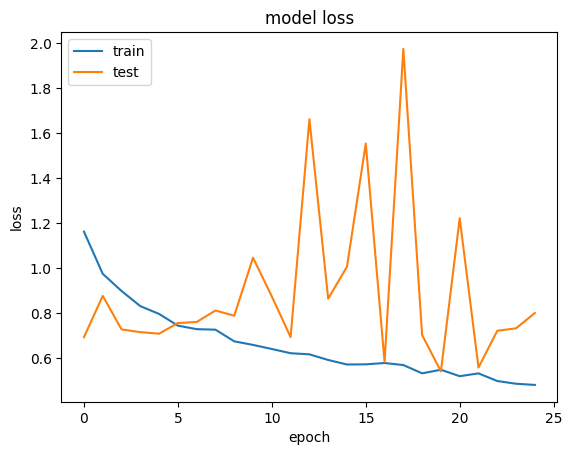

<ipython-input-28-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


elu
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_14 (Bat  (None, 63, 63, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_9 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                  

60/60 [==============================] - 19s 305ms/step - loss: 0.5760 - accuracy: 0.6823 - val_loss: 0.7369 - val_accuracy: 0.6354
Epoch 16/25
60/60 [==============================] - ETA: 0s - loss: 0.5693 - accuracy: 0.7089
Epoch 16: val_accuracy did not improve from 0.63542
60/60 [==============================] - 18s 293ms/step - loss: 0.5693 - accuracy: 0.7089 - val_loss: 0.8992 - val_accuracy: 0.5708
Epoch 17/25
60/60 [==============================] - ETA: 0s - loss: 0.5628 - accuracy: 0.6984
Epoch 17: val_accuracy improved from 0.63542 to 0.67083, saving model to model_64_elu_max.hdf5
60/60 [==============================] - 18s 298ms/step - loss: 0.5628 - accuracy: 0.6984 - val_loss: 0.6508 - val_accuracy: 0.6708
Epoch 18/25
60/60 [==============================] - ETA: 0s - loss: 0.5495 - accuracy: 0.7276
Epoch 18: val_accuracy improved from 0.67083 to 0.71042, saving model to model_64_elu_max.hdf5
60/60 [==============================] - 19s 305ms/step - loss: 0.5495 - accu

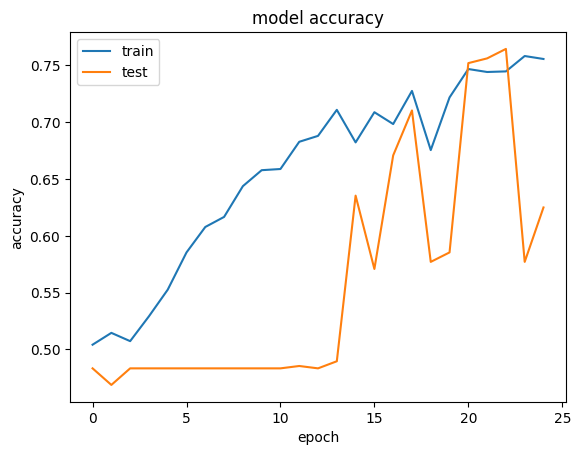

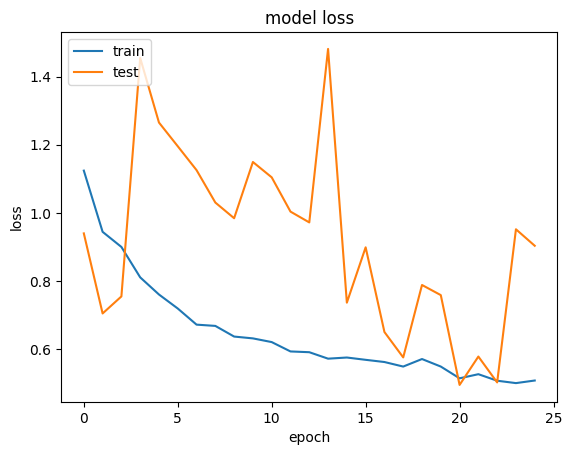

<ipython-input-28-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


gelu
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 63, 63, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_21 (Bat  (None, 63, 63, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                 

60/60 [==============================] - 26s 429ms/step - loss: 0.5528 - accuracy: 0.7161 - val_loss: 0.8180 - val_accuracy: 0.5688
Epoch 16/25
60/60 [==============================] - ETA: 0s - loss: 0.5504 - accuracy: 0.7214
Epoch 16: val_accuracy did not improve from 0.56875
60/60 [==============================] - 26s 425ms/step - loss: 0.5504 - accuracy: 0.7214 - val_loss: 1.4946 - val_accuracy: 0.4854
Epoch 17/25
60/60 [==============================] - ETA: 0s - loss: 0.5376 - accuracy: 0.7292
Epoch 17: val_accuracy did not improve from 0.56875
60/60 [==============================] - 25s 413ms/step - loss: 0.5376 - accuracy: 0.7292 - val_loss: 1.1600 - val_accuracy: 0.5292
Epoch 18/25
60/60 [==============================] - ETA: 0s - loss: 0.5331 - accuracy: 0.7292
Epoch 18: val_accuracy did not improve from 0.56875
60/60 [==============================] - 26s 420ms/step - loss: 0.5331 - accuracy: 0.7292 - val_loss: 1.5986 - val_accuracy: 0.5063
Epoch 19/25
60/60 [============

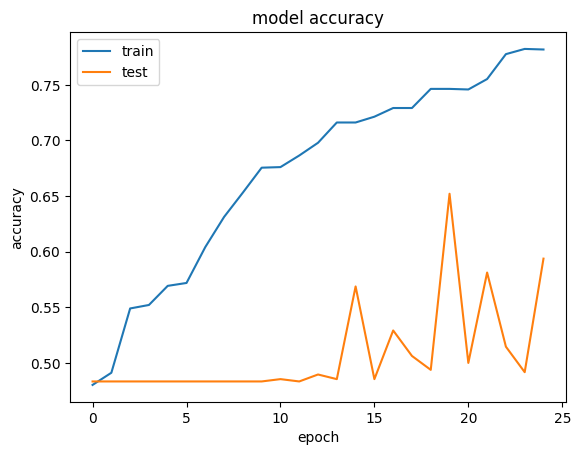

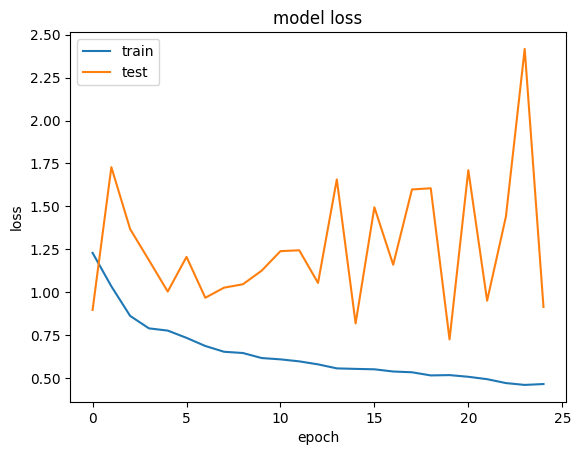

selu
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 63, 63, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_28 (Bat  (None, 63, 63, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_17 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 30, 30, 64)       0         


<ipython-input-28-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


 g2D)                                                            
                                                                 
 batch_normalization_29 (Bat  (None, 30, 30, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_18 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_30 (Bat  (None, 14, 14, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_19 (Conv2D)          (None, 12, 12, 64)        36928     
                                                                 
 max_pooli

Epoch 19/25
60/60 [==============================] - ETA: 0s - loss: 0.5347 - accuracy: 0.7359
Epoch 19: val_accuracy did not improve from 0.73542
60/60 [==============================] - 19s 305ms/step - loss: 0.5347 - accuracy: 0.7359 - val_loss: 1.4839 - val_accuracy: 0.5312
Epoch 20/25
60/60 [==============================] - ETA: 0s - loss: 0.5402 - accuracy: 0.7365
Epoch 20: val_accuracy did not improve from 0.73542
60/60 [==============================] - 18s 297ms/step - loss: 0.5402 - accuracy: 0.7365 - val_loss: 1.3011 - val_accuracy: 0.5458
Epoch 21/25
60/60 [==============================] - ETA: 0s - loss: 0.5307 - accuracy: 0.7307
Epoch 21: val_accuracy improved from 0.73542 to 0.76250, saving model to model_64_selu_max.hdf5
60/60 [==============================] - 18s 298ms/step - loss: 0.5307 - accuracy: 0.7307 - val_loss: 0.5203 - val_accuracy: 0.7625
Epoch 22/25
60/60 [==============================] - ETA: 0s - loss: 0.5219 - accuracy: 0.7526
Epoch 22: val_accuracy d

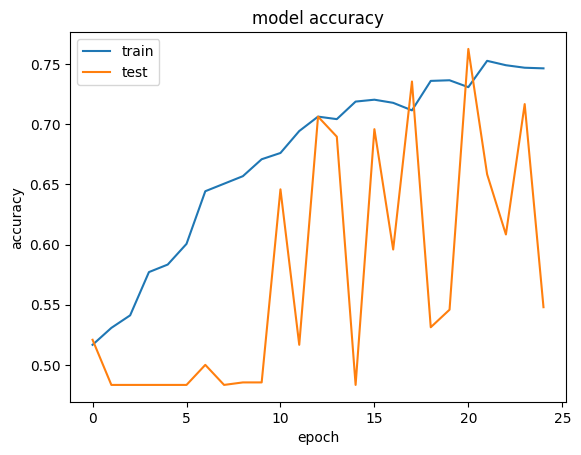

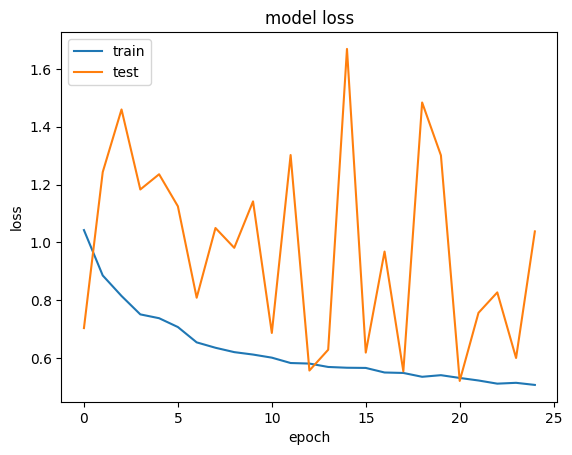

LeakyReLU
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 63, 63, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_35 (Bat  (None, 63, 63, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_21 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                            

<ipython-input-28-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


                                                                 
 batch_normalization_38 (Bat  (None, 6, 6, 64)         256       
 chNormalization)                                                
                                                                 
 flatten_5 (Flatten)         (None, 2304)              0         
                                                                 
 dense_20 (Dense)            (None, 512)               1180160   
                                                                 
 batch_normalization_39 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dense_21 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_40 (Bat  (None, 256)              1024      
 chNormalization)                                                
          

Epoch 23/25
60/60 [==============================] - ETA: 0s - loss: 0.4907 - accuracy: 0.7557
Epoch 23: val_accuracy did not improve from 0.71042
60/60 [==============================] - 17s 281ms/step - loss: 0.4907 - accuracy: 0.7557 - val_loss: 1.1057 - val_accuracy: 0.5271
Epoch 24/25
60/60 [==============================] - ETA: 0s - loss: 0.5129 - accuracy: 0.7573
Epoch 24: val_accuracy did not improve from 0.71042
60/60 [==============================] - 17s 285ms/step - loss: 0.5129 - accuracy: 0.7573 - val_loss: 0.7339 - val_accuracy: 0.6667
Epoch 25/25
60/60 [==============================] - ETA: 0s - loss: 0.4783 - accuracy: 0.7630
Epoch 25: val_accuracy did not improve from 0.71042
60/60 [==============================] - 17s 286ms/step - loss: 0.4783 - accuracy: 0.7630 - val_loss: 0.9407 - val_accuracy: 0.5437
Training time: 0:07:22.231088
Test score: 0.5960798263549805
Test accuracy: 0.7104166746139526
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


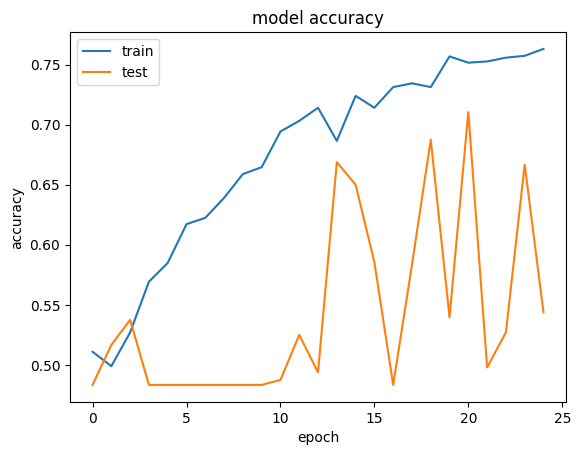

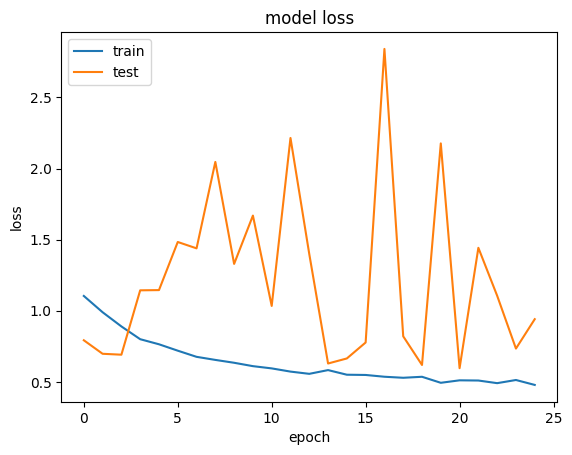

<ipython-input-28-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


In [32]:
for i in act:
    print(i)
#     print(type(i))
    CNN_model(64,i,'max',25)
    

In [33]:
df_r

,activation_function,number_filters,pooling,epochs,test_accuracy
0,relu,62,max,30,0.791667
1,relu,64,max,25,0.722917
2,elu,64,max,25,0.764583
3,gelu,64,max,25,0.652083
4,selu,64,max,25,0.762500
5,LeakyReLU,64,max,25,0.710417


In [34]:
df_r

,activation_function,number_filters,pooling,epochs,test_accuracy
0,relu,62,max,30,0.791667
1,relu,64,max,25,0.722917
2,elu,64,max,25,0.764583
3,gelu,64,max,25,0.652083
4,selu,64,max,25,0.762500
5,LeakyReLU,64,max,25,0.710417


### Finding best activation function with average pooling

relu
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 average_pooling2d (AverageP  (None, 63, 63, 64)       0         
 ooling2D)                                                       
                                                                 
 batch_normalization_42 (Bat  (None, 63, 63, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_25 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 average_pooling2d_1 (Averag  (None, 30, 30, 64)       0         
 ePooling2D)                                                     
                                                 

60/60 [==============================] - ETA: 0s - loss: 0.6384 - accuracy: 0.6411
Epoch 15: val_accuracy did not improve from 0.64792
60/60 [==============================] - 14s 233ms/step - loss: 0.6384 - accuracy: 0.6411 - val_loss: 1.9108 - val_accuracy: 0.5021
Epoch 16/25
60/60 [==============================] - ETA: 0s - loss: 0.6305 - accuracy: 0.6359
Epoch 16: val_accuracy did not improve from 0.64792
60/60 [==============================] - 14s 224ms/step - loss: 0.6305 - accuracy: 0.6359 - val_loss: 0.6549 - val_accuracy: 0.6146
Epoch 17/25
60/60 [==============================] - ETA: 0s - loss: 0.5942 - accuracy: 0.6891
Epoch 17: val_accuracy did not improve from 0.64792
60/60 [==============================] - 14s 236ms/step - loss: 0.5942 - accuracy: 0.6891 - val_loss: 0.8461 - val_accuracy: 0.5021
Epoch 18/25
60/60 [==============================] - ETA: 0s - loss: 0.5899 - accuracy: 0.6781
Epoch 18: val_accuracy did not improve from 0.64792
60/60 [=====================

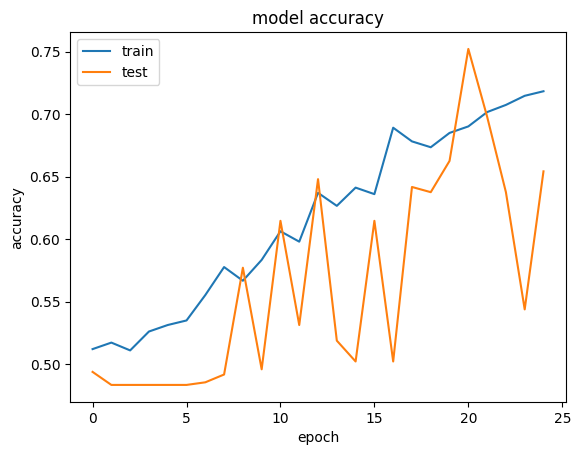

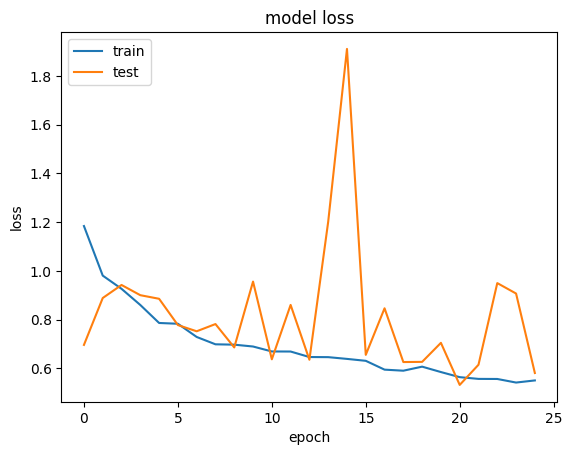

<ipython-input-28-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


elu
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 average_pooling2d_4 (Averag  (None, 63, 63, 64)       0         
 ePooling2D)                                                     
                                                                 
 batch_normalization_49 (Bat  (None, 63, 63, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_29 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 average_pooling2d_5 (Averag  (None, 30, 30, 64)       0         
 ePooling2D)                                                     
                                                  

60/60 [==============================] - ETA: 0s - loss: 0.6718 - accuracy: 0.5823
Epoch 15: val_accuracy did not improve from 0.58333
60/60 [==============================] - 16s 256ms/step - loss: 0.6718 - accuracy: 0.5823 - val_loss: 0.6943 - val_accuracy: 0.5125
Epoch 16/25
60/60 [==============================] - ETA: 0s - loss: 0.6614 - accuracy: 0.5995
Epoch 16: val_accuracy did not improve from 0.58333
60/60 [==============================] - 16s 256ms/step - loss: 0.6614 - accuracy: 0.5995 - val_loss: 0.7246 - val_accuracy: 0.5125
Epoch 17/25
60/60 [==============================] - ETA: 0s - loss: 0.6733 - accuracy: 0.5911
Epoch 17: val_accuracy did not improve from 0.58333
60/60 [==============================] - 15s 248ms/step - loss: 0.6733 - accuracy: 0.5911 - val_loss: 0.7807 - val_accuracy: 0.5375
Epoch 18/25
60/60 [==============================] - ETA: 0s - loss: 0.6559 - accuracy: 0.6156
Epoch 18: val_accuracy improved from 0.58333 to 0.60625, saving model to model_6

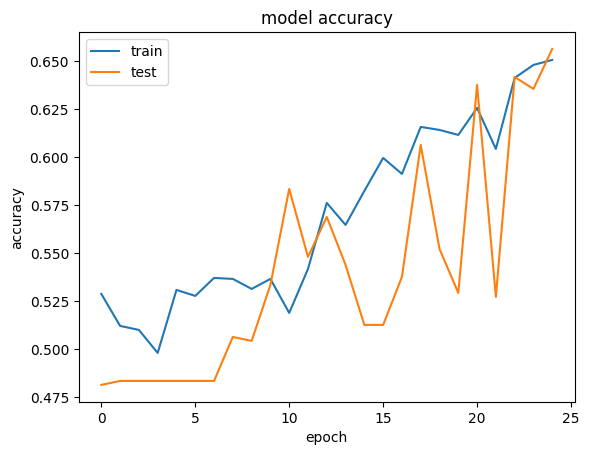

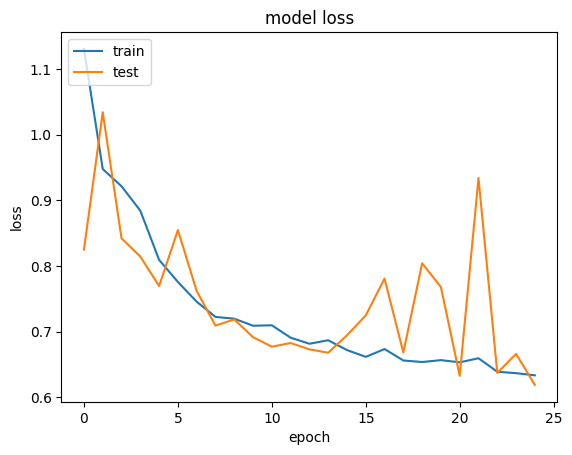

<ipython-input-28-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


gelu
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 average_pooling2d_8 (Averag  (None, 63, 63, 64)       0         
 ePooling2D)                                                     
                                                                 
 batch_normalization_56 (Bat  (None, 63, 63, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_33 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 average_pooling2d_9 (Averag  (None, 30, 30, 64)       0         
 ePooling2D)                                                     
                                                 

60/60 [==============================] - 25s 405ms/step - loss: 0.6429 - accuracy: 0.6302 - val_loss: 0.6391 - val_accuracy: 0.6062
Epoch 16/25
60/60 [==============================] - ETA: 0s - loss: 0.6442 - accuracy: 0.6250
Epoch 16: val_accuracy did not improve from 0.60625
60/60 [==============================] - 23s 385ms/step - loss: 0.6442 - accuracy: 0.6250 - val_loss: 0.6927 - val_accuracy: 0.5333
Epoch 17/25
60/60 [==============================] - ETA: 0s - loss: 0.6496 - accuracy: 0.6177
Epoch 17: val_accuracy did not improve from 0.60625
60/60 [==============================] - 24s 390ms/step - loss: 0.6496 - accuracy: 0.6177 - val_loss: 0.7168 - val_accuracy: 0.5229
Epoch 18/25
60/60 [==============================] - ETA: 0s - loss: 0.6212 - accuracy: 0.6557
Epoch 18: val_accuracy improved from 0.60625 to 0.62500, saving model to model_64_gelu_average.hdf5
60/60 [==============================] - 25s 419ms/step - loss: 0.6212 - accuracy: 0.6557 - val_loss: 0.6486 - val_

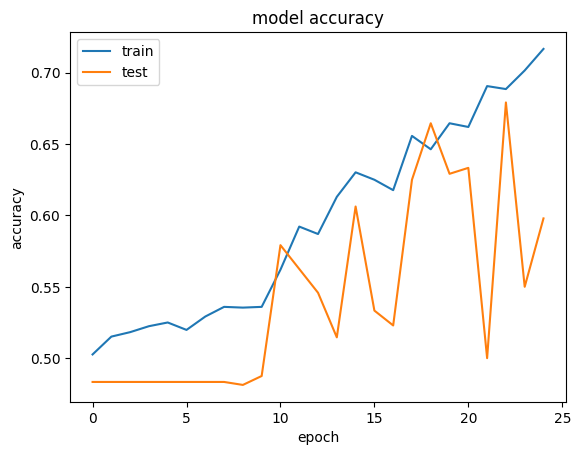

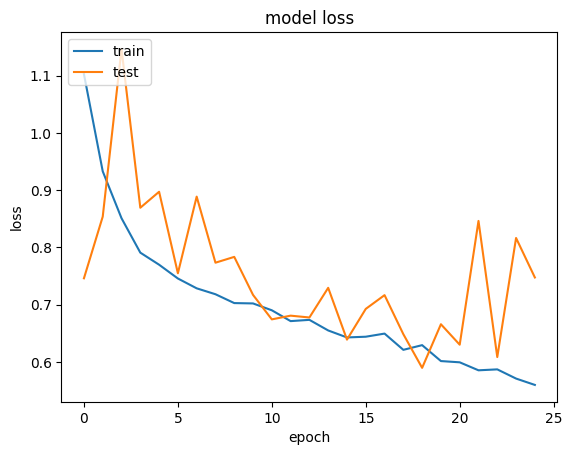

selu
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 average_pooling2d_12 (Avera  (None, 63, 63, 64)       0         
 gePooling2D)                                                    
                                                                 
 batch_normalization_63 (Bat  (None, 63, 63, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_37 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 average_pooling2d_13 (Avera  (None, 30, 30, 64)       0         
 gePooling2D)                                                    
                                                 

<ipython-input-28-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


                                                                 
 dense_37 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_68 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dense_38 (Dense)            (None, 64)                16448     
                                                                 
 batch_normalization_69 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dropout_19 (Dropout)        (None, 64)                0         
                                                                 
 dense_39 (Dense)            (None, 2)                 130       
                                                                 
Total para

60/60 [==============================] - 16s 261ms/step - loss: 0.6281 - accuracy: 0.6526 - val_loss: 1.0681 - val_accuracy: 0.4833
Training time: 0:06:48.879001
Test score: 0.6307942271232605
Test accuracy: 0.6187499761581421
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


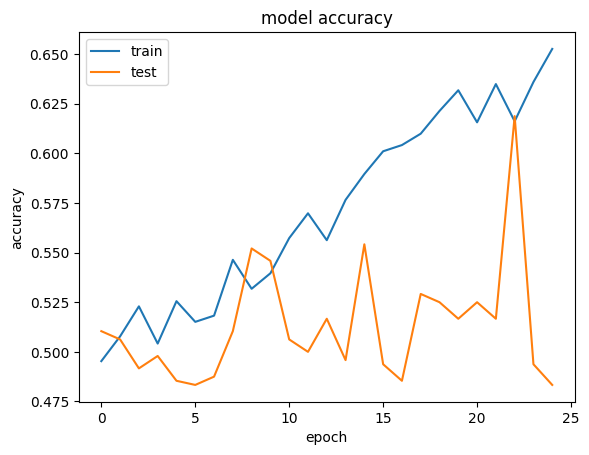

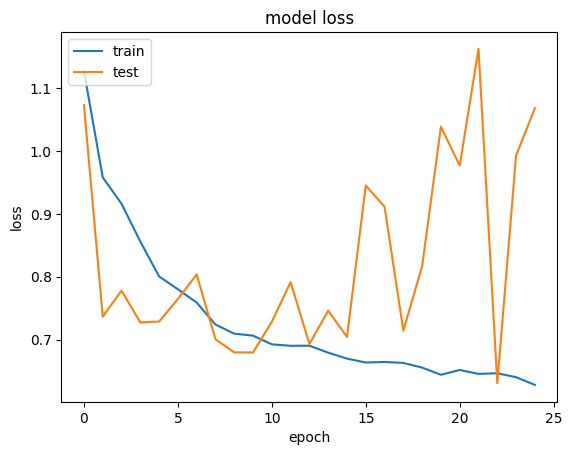

<ipython-input-28-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


LeakyReLU
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 average_pooling2d_16 (Avera  (None, 63, 63, 64)       0         
 gePooling2D)                                                    
                                                                 
 batch_normalization_70 (Bat  (None, 63, 63, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_41 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 average_pooling2d_17 (Avera  (None, 30, 30, 64)       0         
 gePooling2D)                                                    
                                           

60/60 [==============================] - ETA: 0s - loss: 0.6805 - accuracy: 0.5740
Epoch 15: val_accuracy did not improve from 0.64375
60/60 [==============================] - 17s 278ms/step - loss: 0.6805 - accuracy: 0.5740 - val_loss: 0.7243 - val_accuracy: 0.5146
Epoch 16/25
60/60 [==============================] - ETA: 0s - loss: 0.6617 - accuracy: 0.5995
Epoch 16: val_accuracy did not improve from 0.64375
60/60 [==============================] - 16s 270ms/step - loss: 0.6617 - accuracy: 0.5995 - val_loss: 0.7566 - val_accuracy: 0.4958
Epoch 17/25
60/60 [==============================] - ETA: 0s - loss: 0.6638 - accuracy: 0.6062
Epoch 17: val_accuracy did not improve from 0.64375
60/60 [==============================] - 16s 260ms/step - loss: 0.6638 - accuracy: 0.6062 - val_loss: 0.9526 - val_accuracy: 0.4854
Epoch 18/25
60/60 [==============================] - ETA: 0s - loss: 0.6617 - accuracy: 0.6109
Epoch 18: val_accuracy did not improve from 0.64375
60/60 [=====================

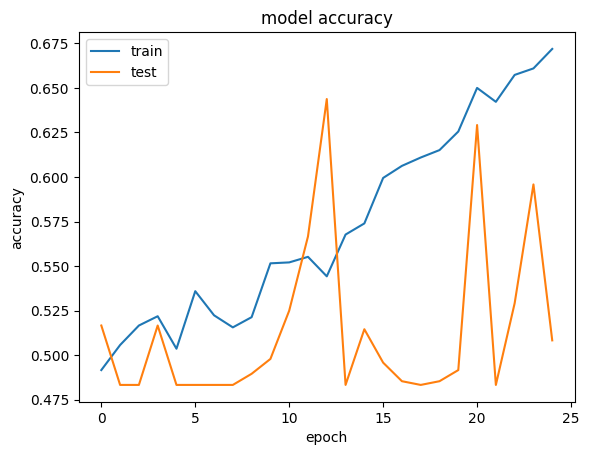

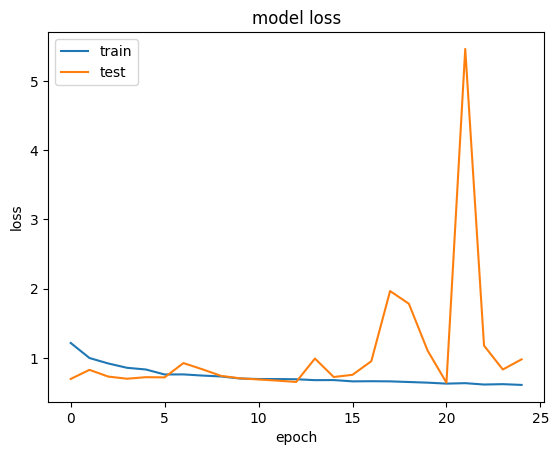

<ipython-input-28-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


In [35]:
for i in act:
    print(i)
#     print(type(i))
    CNN_model(64,i,'average',25)

In [36]:
df_r

,activation_function,number_filters,pooling,epochs,test_accuracy
0,relu,62,max,30,0.791667
1,relu,64,max,25,0.722917
2,elu,64,max,25,0.764583
3,gelu,64,max,25,0.652083
4,selu,64,max,25,0.762500
5,LeakyReLU,64,max,25,0.710417
6,relu,64,average,25,0.752083
7,elu,64,average,25,0.656250
8,gelu,64,average,25,0.679167
9,selu,64,average,25,0.618750


In [37]:
df_r

,activation_function,number_filters,pooling,epochs,test_accuracy
0,relu,62,max,30,0.791667
1,relu,64,max,25,0.722917
2,elu,64,max,25,0.764583
3,gelu,64,max,25,0.652083
4,selu,64,max,25,0.762500
5,LeakyReLU,64,max,25,0.710417
6,relu,64,average,25,0.752083
7,elu,64,average,25,0.656250
8,gelu,64,average,25,0.679167
9,selu,64,average,25,0.618750


In [38]:
gk = df_r.groupby('pooling').mean()
gk.head()

<ipython-input-38-88fbdc02e871>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gk = df_r.groupby('pooling').mean()


,test_accuracy
pooling,
average,0.670000
max,0.734028


In [39]:
gk = df_r.groupby('activation_function').mean()
gk.head()

<ipython-input-39-92edb843cd6a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gk = df_r.groupby('activation_function').mean()


,test_accuracy
activation_function,
LeakyReLU,0.677083
elu,0.710417
gelu,0.665625
relu,0.755556
selu,0.690625


## Conclusion regarding the performance of Activation function

seeing all the results relu to give the best results for max and average type poolings, however on average relu gives best result hence we will chose relu for futrther analysis

## Conclusion regarding the performance of pooling techniques

Max pooling gives the best results compared overall

## The best activation function is 'RELU'   and the best pooling technique is 'Maxpooling'  

## Finding the effect of number of filters on our best activation and pooling model

16
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 63, 63, 16)       0         
 g2D)                                                            
                                                                 
 batch_normalization_77 (Bat  (None, 63, 63, 16)       64        
 chNormalization)                                                
                                                                 
 conv2d_45 (Conv2D)          (None, 61, 61, 16)        2320      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 30, 30, 16)       0         
 g2D)                                                            
                                                  

60/60 [==============================] - ETA: 0s - loss: 0.6161 - accuracy: 0.6635
Epoch 15: val_accuracy did not improve from 0.64375
60/60 [==============================] - 7s 115ms/step - loss: 0.6161 - accuracy: 0.6635 - val_loss: 0.6560 - val_accuracy: 0.6146
Epoch 16/25
60/60 [==============================] - ETA: 0s - loss: 0.6116 - accuracy: 0.6646
Epoch 16: val_accuracy did not improve from 0.64375
60/60 [==============================] - 7s 114ms/step - loss: 0.6116 - accuracy: 0.6646 - val_loss: 0.8227 - val_accuracy: 0.5250
Epoch 17/25
60/60 [==============================] - ETA: 0s - loss: 0.5970 - accuracy: 0.6682
Epoch 17: val_accuracy did not improve from 0.64375
60/60 [==============================] - 8s 124ms/step - loss: 0.5970 - accuracy: 0.6682 - val_loss: 2.6182 - val_accuracy: 0.4833
Epoch 18/25
60/60 [==============================] - ETA: 0s - loss: 0.5904 - accuracy: 0.6807
Epoch 18: val_accuracy did not improve from 0.64375
60/60 [========================

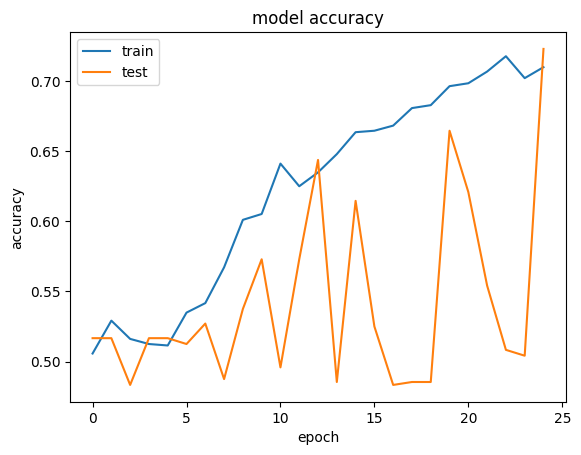

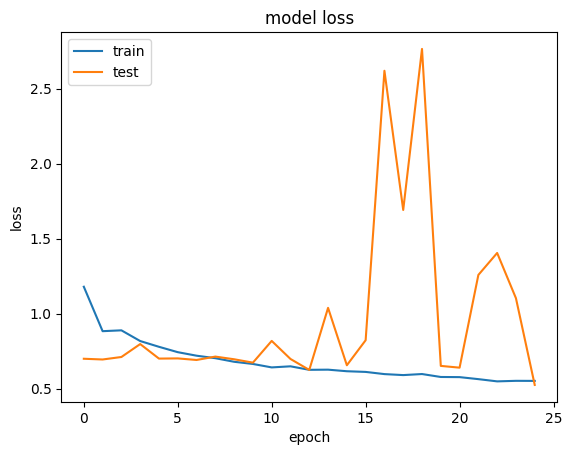

<ipython-input-28-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


32
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_84 (Bat  (None, 63, 63, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_49 (Conv2D)          (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                  

60/60 [==============================] - ETA: 0s - loss: 0.5925 - accuracy: 0.6880
Epoch 15: val_accuracy did not improve from 0.67292
60/60 [==============================] - 10s 159ms/step - loss: 0.5925 - accuracy: 0.6880 - val_loss: 0.7958 - val_accuracy: 0.6333
Epoch 16/25
60/60 [==============================] - ETA: 0s - loss: 0.5693 - accuracy: 0.6979
Epoch 16: val_accuracy did not improve from 0.67292
60/60 [==============================] - 8s 129ms/step - loss: 0.5693 - accuracy: 0.6979 - val_loss: 0.6924 - val_accuracy: 0.6187
Epoch 17/25
60/60 [==============================] - ETA: 0s - loss: 0.5690 - accuracy: 0.7099
Epoch 17: val_accuracy did not improve from 0.67292
60/60 [==============================] - 8s 129ms/step - loss: 0.5690 - accuracy: 0.7099 - val_loss: 0.9240 - val_accuracy: 0.5479
Epoch 18/25
60/60 [==============================] - ETA: 0s - loss: 0.5600 - accuracy: 0.7094
Epoch 18: val_accuracy did not improve from 0.67292
60/60 [=======================

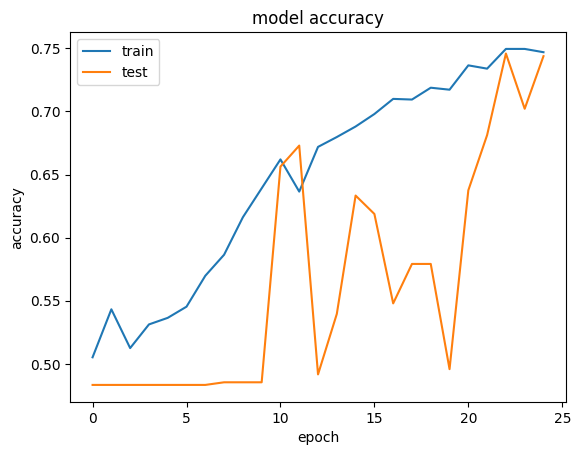

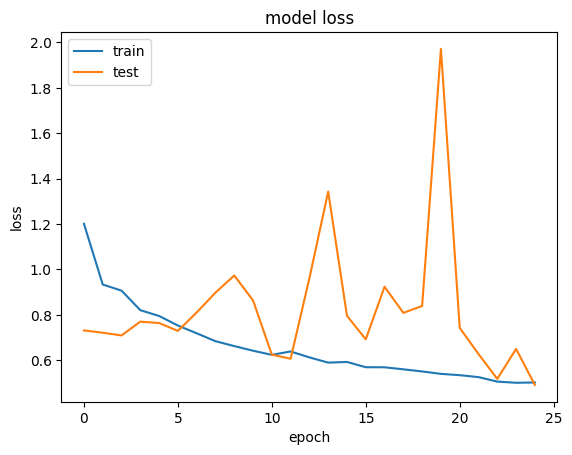

<ipython-input-28-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


64
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 63, 63, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_91 (Bat  (None, 63, 63, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_53 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                  

60/60 [==============================] - ETA: 0s - loss: 0.5653 - accuracy: 0.7161
Epoch 15: val_accuracy did not improve from 0.70417
60/60 [==============================] - 16s 258ms/step - loss: 0.5653 - accuracy: 0.7161 - val_loss: 0.5681 - val_accuracy: 0.6812
Epoch 16/25
60/60 [==============================] - ETA: 0s - loss: 0.5543 - accuracy: 0.7036
Epoch 16: val_accuracy did not improve from 0.70417
60/60 [==============================] - 18s 291ms/step - loss: 0.5543 - accuracy: 0.7036 - val_loss: 1.6048 - val_accuracy: 0.4875
Epoch 17/25
60/60 [==============================] - ETA: 0s - loss: 0.5313 - accuracy: 0.7365
Epoch 17: val_accuracy improved from 0.70417 to 0.71458, saving model to model_64_relu_max.hdf5
60/60 [==============================] - 16s 267ms/step - loss: 0.5313 - accuracy: 0.7365 - val_loss: 0.5591 - val_accuracy: 0.7146
Epoch 18/25
60/60 [==============================] - ETA: 0s - loss: 0.5273 - accuracy: 0.7266
Epoch 18: val_accuracy improved from

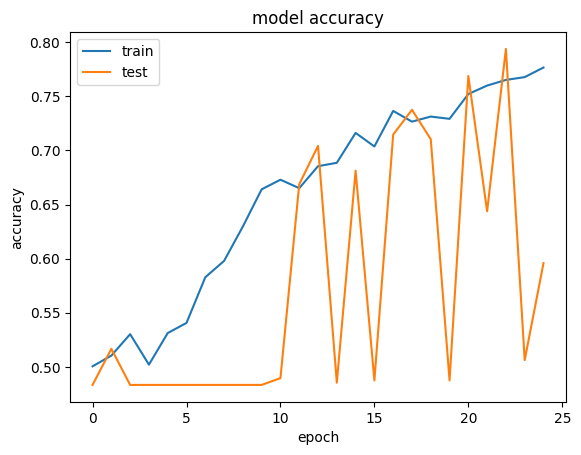

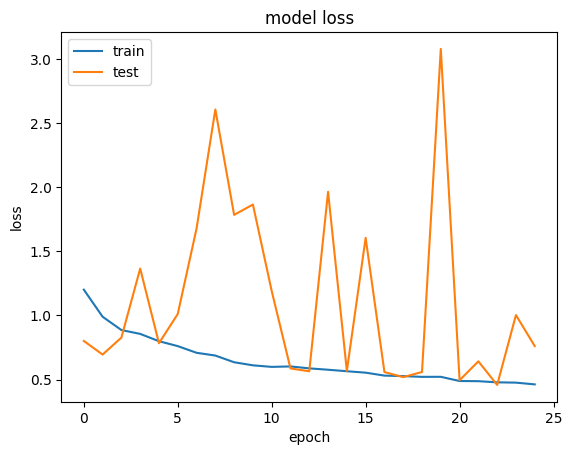

<ipython-input-28-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


128
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_56 (Conv2D)          (None, 126, 126, 128)     3584      
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 63, 63, 128)      0         
 g2D)                                                            
                                                                 
 batch_normalization_98 (Bat  (None, 63, 63, 128)      512       
 chNormalization)                                                
                                                                 
 conv2d_57 (Conv2D)          (None, 61, 61, 128)       147584    
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 30, 30, 128)      0         
 g2D)                                                            
                                                 

Epoch 16/25
60/60 [==============================] - ETA: 0s - loss: 0.5062 - accuracy: 0.7469
Epoch 16: val_accuracy improved from 0.64792 to 0.65625, saving model to model_128_relu_max.hdf5
60/60 [==============================] - 38s 637ms/step - loss: 0.5062 - accuracy: 0.7469 - val_loss: 0.6888 - val_accuracy: 0.6562
Epoch 17/25
60/60 [==============================] - ETA: 0s - loss: 0.5122 - accuracy: 0.7464
Epoch 17: val_accuracy improved from 0.65625 to 0.66667, saving model to model_128_relu_max.hdf5
60/60 [==============================] - 41s 683ms/step - loss: 0.5122 - accuracy: 0.7464 - val_loss: 0.6583 - val_accuracy: 0.6667
Epoch 18/25
60/60 [==============================] - ETA: 0s - loss: 0.5032 - accuracy: 0.7484
Epoch 18: val_accuracy improved from 0.66667 to 0.70625, saving model to model_128_relu_max.hdf5
60/60 [==============================] - 38s 629ms/step - loss: 0.5032 - accuracy: 0.7484 - val_loss: 0.7169 - val_accuracy: 0.7063
Epoch 19/25
60/60 [=========

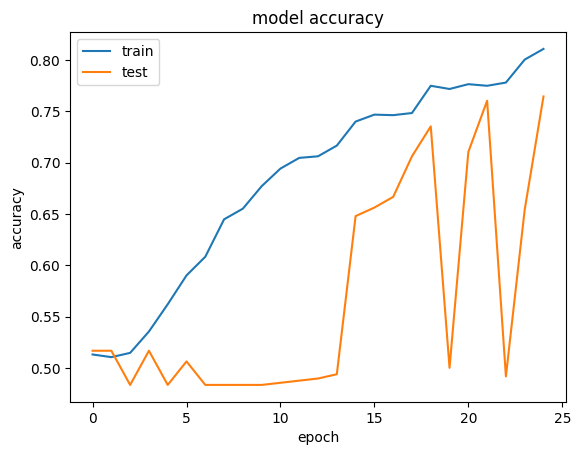

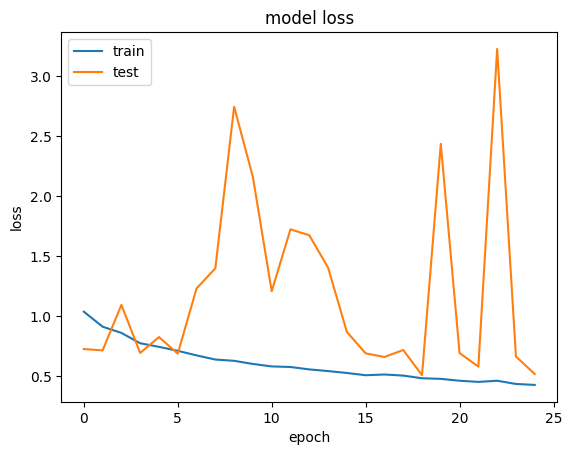

<ipython-input-28-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


In [40]:
f= [16,32,64,128]

for i in f:
    print(i)
#     print(type(i))
    CNN_model(i,'relu','max',25)

In [41]:
df_r

,activation_function,number_filters,pooling,epochs,test_accuracy
0,relu,62,max,30,0.791667
1,relu,64,max,25,0.722917
2,elu,64,max,25,0.764583
3,gelu,64,max,25,0.652083
4,selu,64,max,25,0.762500
5,LeakyReLU,64,max,25,0.710417
6,relu,64,average,25,0.752083
7,elu,64,average,25,0.656250
8,gelu,64,average,25,0.679167
9,selu,64,average,25,0.618750


## Conculsion of the effect of number of results

From the results we can see increasing the number of filters does increase the accuaracy upto a point after that the accuracy can decrease so we need to find the optimal number of filters. 

### from above results 64 filters give the best results

## the best model is with 'relu' activation function 64 filters and maxpooling can give results from accuracy of 0.73 to 0.79

Saving the results in a csv file

In [42]:
df_results1=df_r.copy()
df_results1['dataset']='cars_wagonr_swift'
df_results1.head()

,activation_function,number_filters,pooling,epochs,test_accuracy,dataset
0,relu,62,max,30,0.791667,cars_wagonr_swift
1,relu,64,max,25,0.722917,cars_wagonr_swift
2,elu,64,max,25,0.764583,cars_wagonr_swift
3,gelu,64,max,25,0.652083,cars_wagonr_swift
4,selu,64,max,25,0.762500,cars_wagonr_swift


In [43]:
df_results1.to_csv('df_results1_d6.csv',index=False)

In [44]:
df_results1.sort_values('test_accuracy',ascending= False)

,activation_function,number_filters,pooling,epochs,test_accuracy,dataset
13,relu,64,max,25,0.793750,cars_wagonr_swift
0,relu,62,max,30,0.791667,cars_wagonr_swift
2,elu,64,max,25,0.764583,cars_wagonr_swift
14,relu,128,max,25,0.764583,cars_wagonr_swift
4,selu,64,max,25,0.762500,cars_wagonr_swift
6,relu,64,average,25,0.752083,cars_wagonr_swift
12,relu,32,max,25,0.745833,cars_wagonr_swift
1,relu,64,max,25,0.722917,cars_wagonr_swift
11,relu,16,max,25,0.722917,cars_wagonr_swift
5,LeakyReLU,64,max,25,0.710417,cars_wagonr_swift


#### the imagenet models were run on kaggle notebooks

# Using imagenet winner model

## Resnet

2022-11-26 09:47:34.208682: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-26 09:47:34.209535: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-26 09:47:34.210301: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-26 09:47:34.210996: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-26 09:47:34.211662: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

94781440/94765736 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
_____________________________

2022-11-26 09:47:37.029659: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25


2022-11-26 09:47:44.044507: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


60/60 [==============================] - 31s 198ms/step - loss: 0.8927 - accuracy: 0.5349 - val_loss: 3.4379 - val_accuracy: 0.5167

Epoch 00001: val_accuracy improved from -inf to 0.51667, saving model to resnet_model.hdf5


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/25
60/60 [==============================] - 11s 187ms/step - loss: 0.7265 - accuracy: 0.5432 - val_loss: 0.6935 - val_accuracy: 0.4833

Epoch 00002: val_accuracy did not improve from 0.51667
Epoch 3/25
60/60 [==============================] - 10s 172ms/step - loss: 0.6842 - accuracy: 0.5714 - val_loss: 0.6977 - val_accuracy: 0.5167

Epoch 00003: val_accuracy did not improve from 0.51667
Epoch 4/25
60/60 [==============================] - 10s 172ms/step - loss: 0.6649 - accuracy: 0.6177 - val_loss: 0.7197 - val_accuracy: 0.5167

Epoch 00004: val_accuracy did not improve from 0.51667
Epoch 5/25
60/60 [==============================] - 11s 185ms/step - loss: 0.6316 - accuracy: 0.6604 - val_loss: 0.7269 - val_accuracy: 0.5167

Epoch 00005: val_accuracy did not improve from 0.51667
Epoch 6/25
60/60 [==============================] - 11s 176ms/step - loss: 0.6199 - accuracy: 0.6844 - val_loss: 0.7445 - val_accuracy: 0.5167

Epoch 00006: val_accuracy did not improve from 0.51667
Epoch

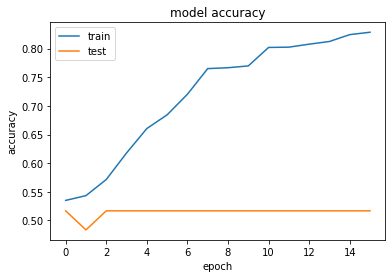

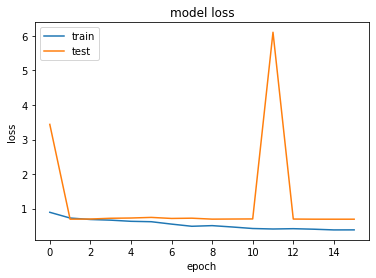

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input

resnet = tf.keras.applications.ResNet50(input_shape=(x_train.shape[1:]), include_top=False,
                                        weights='imagenet', classes=num_classes)

x = GlobalAveragePooling2D()(resnet.output)
x = Dense(units=512, activation='relu')(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.5)(x)

output = Dense(units=num_classes,activation = 'softmax')(x)
model_resnet = Model(resnet.input, output)
model_resnet.summary()


batch_size = 32

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

#     opt = tf.keras.optimizers.Adam(learning_rate=0.1)


# Let's train the model_1 using RMSprop
model_resnet.compile(loss='categorical_crossentropy',
            optimizer=opt,
            metrics=['accuracy'])

now = datetime.now
t= now()

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=15, baseline=0.2, restore_best_weights=True)


filepath = 'resnet_model.hdf5'
checkpoint = ModelCheckpoint( 
                            filepath=filepath,
                             monitor='val_accuracy',
                             verbose=1, 
                             save_best_only=True,
                             mode='max')


epoch=25

history = model_resnet.fit(datagen_preprocessing.flow(x_train,y_train,
                                    batch_size=batch_size, 
                                    seed=27,
                                    shuffle=False),
                            batch_size=batch_size,
                            epochs=epoch,
                            validation_data=(x_test, y_test),
                            callbacks=[checkpoint,es],
                            shuffle=True)




print('Training time: %s' % (now() - t))


model_l2 = load_model(filepath)

score = model_l2.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



# Inception_V3

87924736/87910968 [==============================] - 1s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 63, 63, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 63, 63, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 63, 63, 32)   0           batch_normalization[0][0]        
___________________________

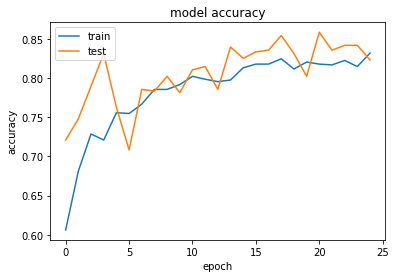

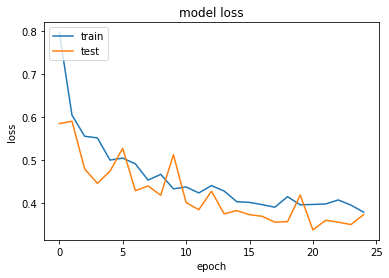

In [ ]:


from tensorflow.keras.applications.inception_v3 import preprocess_input

InceptionV3_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, 
                                                      input_shape=(x_train.shape[1:]))

for layer in InceptionV3_model.layers[:-15]:
    layer.trainable = False

x = InceptionV3_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
output  = Dense(units=num_classes, activation='softmax')(x)
model_inception = Model(InceptionV3_model.input, output)

model_inception.summary()



batch_size = 32

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

#     opt = tf.keras.optimizers.Adam(learning_rate=0.1)


# Let's train the model_1 using RMSprop
model_inception.compile(loss='categorical_crossentropy',
            optimizer=opt,
            metrics=['accuracy'])


now = datetime.now
t= now()

# t= now()

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=15, baseline=0.2, restore_best_weights=True)


filepath = 'inception_v3_model.hdf5'
checkpoint = ModelCheckpoint( 
                            filepath=filepath,
                             monitor='val_accuracy',
                             verbose=1, 
                             save_best_only=True,
                             mode='max')



epoch=25

history = model_inception.fit(datagen_preprocessing.flow(x_train,y_train,
                                    batch_size=batch_size, 
                                    seed=27,
                                    shuffle=False),
                            batch_size=batch_size,
                            epochs=epoch,
                            validation_data=(x_test, y_test),
                            callbacks=[checkpoint,es],
                            shuffle=True)



print('Training time: %s' % (now() - t))


model_l2 = load_model(filepath)

score = model_l2.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



# VGG

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

58900480/58889256 [==============================] - 0s 0us/step
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
____________________________________________________________

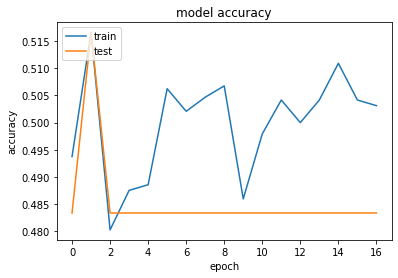

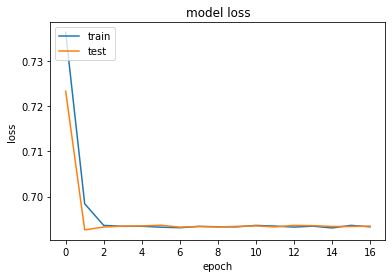

In [ ]:


vgg16 = tf.keras.applications.VGG16(include_top=False, weights='imagenet',input_shape=x_train.shape[1:],classes=58)

x = vgg16.output


x = GlobalAveragePooling2D()(x)

x = Dense(units=512, activation='relu')(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.5)(x)


output = Dense(units=num_classes,activation = 'softmax')(x)
model_vgg16 = Model(vgg16.input, output)
model_vgg16.summary()


batch_size = 32

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

#     opt = tf.keras.optimizers.Adam(learning_rate=0.1)


# Let's train the model_1 using RMSprop
model_vgg16.compile(loss='categorical_crossentropy',
            optimizer=opt,
            metrics=['accuracy'])

now = datetime.now
t= now()

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=15, baseline=0.2, restore_best_weights=True)


filepath = 'vgg16_model.hdf5'
checkpoint = ModelCheckpoint( 
                            filepath=filepath,
                             monitor='val_accuracy',
                             verbose=1, 
                             save_best_only=True,
                             mode='max')


epoch=25

history = model_vgg16.fit(datagen_preprocessing.flow(x_train,y_train,
                                    batch_size=batch_size, 
                                    seed=27,
                                    shuffle=False),
                            batch_size=batch_size,
                            epochs=epoch,
                            validation_data=(x_test, y_test),
                            callbacks=[checkpoint,es],
                            shuffle=True)



print('Training time: %s' % (now() - t))


model_l2 = load_model(filepath)

score = model_l2.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



## Results conculsion done on seperate file of all the datasets